# Pandas and plots for data analysis
  Abhijit Dasgupta, PhD (ARAASTAT/District Data Labs)

# Tools

+ Anaconda Python Distribution
    - pandas (version 0.23)
    - seaborn (version 0.9)
    - numpy
    - scipy
    - matplotlib

# Objectives

+ Use `pandas` for data ingestion and munging (50 minutes)
    - Reading data from a variety of sources
    - Use of `Series` and `DataFrame` objects
    - Data cleaning
    - Transforming datasets
    - The "split-apply-combine" paradigm
    - Computing various data summaries

# Objectives
+ Use `matplotlib` and `seaborn` for creating plots useful for data analysis (30 minutes)
    - Histograms and density plots
    - Bar graphs
    - Box and violin plots
    - Scatter plots with smoothers
    - Trellis graphics/small multiples
    - Grouped data

# Objectives
+ Introduce other `PyData` packages (10 minutes)
    - `statsmodels` for statistical modeling

# Starting up

# Starting up

+ I assume you know the basics of Python
+ For this tutorial, I'll refresh the concepts of
    - lists `[]`
    - dicts `{}`

# Lists

Lists are basically buckets where you can store things

1. List members can be of any type
1. Lists are ordered, i.e there is a first and last member

In [42]:
L1 = ['Abhijit','Dasgupta', 47, True]
L2 = ['Tracy','Bergemann', 43, False]

In [43]:
L1[0]

'Abhijit'

In [44]:
L2[1:3]

['Bergemann', 43]

> The notation `a:b` means we include `a` but stop before `b`.
> In Python we also start counting from 0

You can also start counting from the right.


In [45]:
L2[-2]

43

You can also replace elements


In [46]:
L2[-2] = 49
L2

['Tracy', 'Bergemann', 49, False]



# Dicts

Dicts are _key-value pairs_:

- Keys can be strings, numbers or _tuples_
- Values can be anything
- There is no ordering

> Tuples are like lists, are denoted using `()`, and are immutable,
> i.e., once set, they can't be changed.



In [47]:
D1 = {'First': "Abhijit", "Last": "Dasgupta", "Age": 47, "Male": True}
D2 = {"First": "Tracy", "Last":"Bergemann", "Age": 43, "Male":False}

In [48]:
D1['First']

'Abhijit'

# Python packages

# Packages we'll use

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> You provide shortcuts to save typing (since we're all lazy)

You call functions and other elements of packages using a `.` notation


In [50]:
A1 = np.array(L1)

In [51]:
A1

array(['Abhijit', 'Dasgupta', '47', 'True'], dtype='<U8')

Note that the number and boolean are both converted to strings.
Numpy arrays can only hold items of __one type__, and so conversion happens

# Pandas
![](figures/panda1.jpg)

# Pandas
Pandas builds off of numpy.

1. A 1-dimensional numpy array becomes a `Series`
1. A 2-dimensional numpy array becomes a `DataFrame`

In [52]:
pd.Series(L1)

0     Abhijit
1    Dasgupta
2          47
3        True
dtype: object

The elements are all of the same type, but each element has a _label_,
which `pandas` calls an `Index`.



In [53]:
pd.Series(L1).index

RangeIndex(start=0, stop=4, step=1)


# DataFrames
The `DataFrame` is a bit different, and was one of the PyData game-changers

A `DataFrame` is composed of several columns, each of which are `Series`,
but __each column can be of a different type__



In [54]:
DF = pd.DataFrame([D1,D2])
DF

,Age,First,Last,Male
0,47,Abhijit,Dasgupta,True
1,43,Tracy,Bergemann,False


We can see the types of each column:


In [55]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
Age      2 non-null int64
First    2 non-null object
Last     2 non-null object
Male     2 non-null bool
dtypes: bool(1), int64(1), object(2)
memory usage: 130.0+ bytes



You could also create a `DataFrame` from a numpy 2-d array, and a
single `dict` where all the elements are of the same length (think we
  want to create a rectangular data structure)



In [56]:
raw = {'First': ['John','Paul','Ringo'],'Last' : ['Lennon','McCartney','Starr'],  'Age' : [np.nan, 69, 68]}
D = pd.DataFrame(raw)
D

,First,Last,Age
0,John,Lennon,NaN
1,Paul,McCartney,69.0
2,Ringo,Starr,68.0


> I put in a missing value here. I'll come back to missing values in a bit

# Where does `pandas` play?

![](figures/DSPipelinecopy.png)
<p style="text-align:right;font-size:9pt;">
Practical Data Science Cookbook by Ojeda, Murphy, Dasgupta, Bengfort

# Data ingestion

Pandas can read data from a wide variety of file types

1. Text (csv, tsv, fixed width)
1. Excel
1. Statistical packages (SAS, Stata)
1. SQL databases
1. Parquet and Feather
1. JSON

Pandas also uses a common structure to read these: `pd.read_*`

# Data ingestion

In [57]:
d1 = pd.read_csv('data/diamonds.csv')
d2 = pd.read_excel('data/diamonds.xlsx')
d3 = pd.read_sas('data/diamonds.sas7bdat')

You have to do a bit more for SQL:


In [58]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///data/diamonds.sqlite')
d4 = pd.read_sql_table('diamonds', engine.connect())
d5 = pd.read_sql('select * from diamonds', engine.connect())

# Data munging

# Slicing and dicing

In [59]:
scientists = pd.read_csv('data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician



## Extracting a single column



In [60]:
scientists['Age'] # or scientists.Age

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64


## Extracting a range of rows


In [61]:
scientists[1:5]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist



## Extracting a range of columns by position


In [62]:
scientists.iloc[:, 1:3]

,Born,Died
0,1920-07-25,1958-04-16
1,1876-06-13,1937-10-16
2,1820-05-12,1910-08-13
3,1867-11-07,1934-07-04
4,1907-05-27,1964-04-14
5,1813-03-15,1858-06-16
6,1912-06-23,1954-06-07
7,1777-04-30,1855-02-23



## Extracting a range of columns by label



In [63]:
scientists.loc[:, 'Born':'Age']

,Born,Died,Age
0,1920-07-25,1958-04-16,37
1,1876-06-13,1937-10-16,61
2,1820-05-12,1910-08-13,90
3,1867-11-07,1934-07-04,66
4,1907-05-27,1964-04-14,56
5,1813-03-15,1858-06-16,45
6,1912-06-23,1954-06-07,41
7,1777-04-30,1855-02-23,77


> When you extract by label (`.loc`), pandas grabs the last one too!! Something
> to be careful of.



In [64]:
scientists.loc[:3,['Name','Age']]

,Name,Age
0,Rosaline Franklin,37
1,William Gosset,61
2,Florence Nightingale,90
3,Marie Curie,66



# Slicing and dicing by condition



In [65]:
d = pd.read_csv('data/diamonds.csv')
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [66]:
d[d.carat < 0.3].head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [67]:
#d[d.carat < 0.3 & d.color == 'E'].head()

In [68]:
d.query("(carat < 0.3) & (color == 'E')")

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
14,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
21,0.23,Very Good,E,VS2,63.8,55.0,352,3.85,3.92,2.48
32,0.23,Very Good,E,VS1,60.7,59.0,402,3.97,4.01,2.42
33,0.23,Very Good,E,VS1,59.5,58.0,402,4.01,4.06,2.40
36,0.23,Good,E,VS1,64.1,59.0,402,3.83,3.85,2.46
48,0.25,Very Good,E,VS2,63.3,60.0,404,4.00,4.03,2.54



# Stacking



In [69]:
d1 = pd.read_csv('data/concat_1.csv')
d2 = pd.read_csv('data/concat_2.csv')
d3 = pd.read_csv('data/concat_3.csv')

In [70]:
d1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [71]:
d2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [72]:
d3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [73]:
pd.concat([d1,d2,d3])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [74]:
pd.concat([d1,d2,d3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11



# Merging


In [75]:
survey1 = pd.read_csv('data/survey_person.csv')
survey2 = pd.read_csv('data/survey_survey.csv')

In [76]:
survey1

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [77]:
survey2

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.50
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26.00


# Joins
![](figures/joins.png)

# Joins

In [78]:
d = pd.merge(survey1, survey2, how='right', left_on='ident', right_on='person')


# Data summaries


In [79]:
d = pd.read_csv('data/diamonds.csv')
d.describe(include=np.object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [80]:
d.carat.median()

0.7

In [81]:
d[['carat','price']].agg([np.mean,np.median, np.std])

,carat,price
mean,0.797940,3932.799722
median,0.700000,2401.000000
std,0.474011,3989.439738


In [82]:
d.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

# Grouped summaries (split-apply-combine)
![](figures/SplitApplyCombine.png)

# Grouped summaries

Find the average price of diamonds by color.

In [83]:
d.groupby('clarity')['price'].mean()

clarity
I1      3924.168691
IF      2864.839106
SI1     3996.001148
SI2     5063.028606
VS1     3839.455391
VS2     3924.989395
VVS1    2523.114637
VVS2    3283.737071
Name: price, dtype: float64


# Grouped summaries

What is the average life expectancy in countries by year?



In [84]:
gapminder = pd.read_csv('data/gapminder.tsv', sep='\t')
gapminder.groupby(['continent','year'])['lifeExp'].mean()

continent  year
Africa     1952    39.135500
           1957    41.266346
           1962    43.319442
           1967    45.334538
           1972    47.450942
           1977    49.580423
           1982    51.592865
           1987    53.344788
           1992    53.629577
           1997    53.598269
           2002    53.325231
           2007    54.806038
Americas   1952    53.279840
           1957    55.960280
           1962    58.398760
           1967    60.410920
           1972    62.394920
           1977    64.391560
           1982    66.228840
           1987    68.090720
           1992    69.568360
           1997    71.150480
           2002    72.422040
           2007    73.608120
Asia       1952    46.314394
           1957    49.318544
           1962    51.563223
           1967    54.663640
           1972    57.319269
           1977    59.610556
           1982    62.617939
           1987    64.851182
           1992    66.537212
           1997    68.02051

# Tidy data

The concept of tidy data is that one should have

1. One row per observation
1. One column per variable
1. Each type of observational unit forms a table

# Tidying data

In [85]:
pew = pd.read_csv('data/pew.csv')
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


There's data in the column headers

There needs to be a column for a new variable for income.



In [86]:
pew_long = pd.melt(pew, id_vars = 'religion')
pew_long.head()

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15


# Data cleaning

# Data cleaning

In [87]:
diabetes = pd.read_csv('data/diabetic_data.csv')
diabetes.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [88]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [89]:
diabetes[diabetes=='?'] = np.nan

In [90]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64


See if there are any missing, by applying a function to each column


In [91]:
diabetes.apply(lambda x: np.sum(pd.isna(x)))

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 


# Filling in missing values



In [92]:
d = pd.DataFrame({'x':[1, 2, np.nan, 4],'y' : [10, np.nan, 92, np.nan]})
d

,x,y
0,1.0,10.0
1,2.0,NaN
2,NaN,92.0
3,4.0,NaN


In [93]:
d.dropna()

,x,y
0,1.0,10.0


In [94]:
d.ffill()

,x,y
0,1.0,10.0
1,2.0,10.0
2,2.0,92.0
3,4.0,92.0


In [95]:
d.fillna(250)

,x,y
0,1.0,10.0
1,2.0,250.0
2,250.0,92.0
3,4.0,250.0


# Data visualization

# Data visualization

We can start with `pandas`, which runs `matplotlib` underneath.

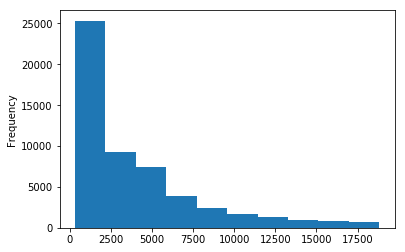

In [96]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds['price'].plot(kind='hist');

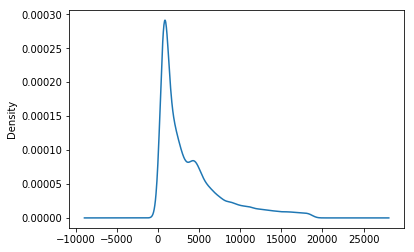

In [97]:
diamonds['price'].plot(kind='density')

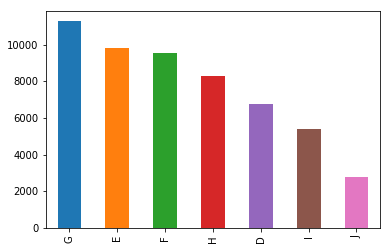

In [98]:
diamonds['color'].value_counts().plot(kind='bar')


## Looking at 2 variables


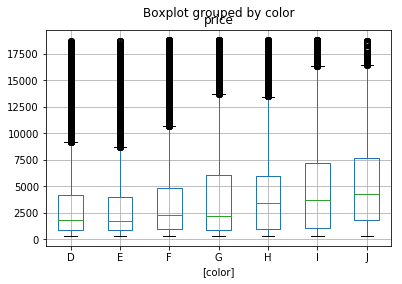

In [99]:
diamonds[['color','price']].boxplot(by='color');

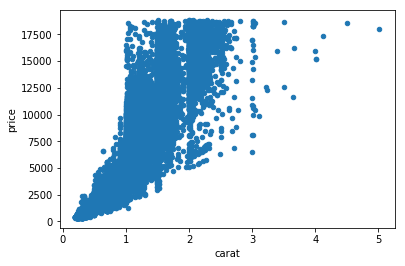

In [100]:
diamonds.plot.scatter(x='carat',y='price')

# Seaborn

# Seaborn

The package `seaborn` provides more involved graphs, as well as nicer looking graphs
It is built on top of `matplotlib`, so we tend to load both together.

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



# Univariate plots



/Users/abhijit/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


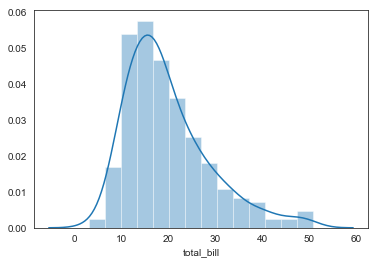

In [102]:
sns.set_style('white')
sns.distplot(tips.total_bill);

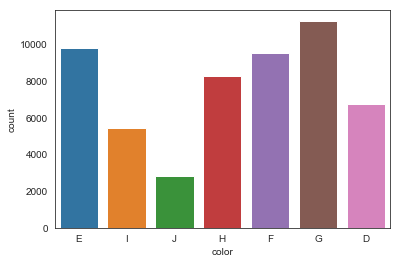

In [103]:
sns.countplot(x = 'color', data=diamonds);

# Bivariate plots

You can start with a plain scatterplot



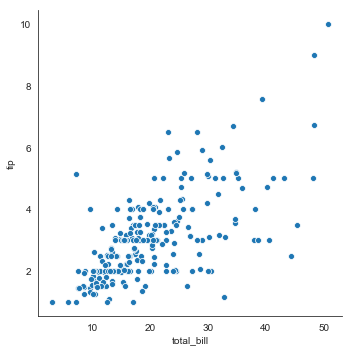

In [104]:
sns.relplot(x = 'total_bill', y = 'tip', data=tips);


# Bivariate plots

Use color to condition on one variable


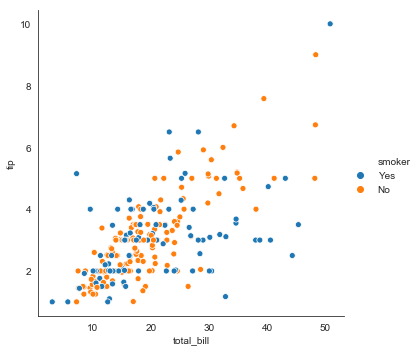

In [105]:
sns.relplot(x = 'total_bill', y = 'tip', hue='smoker', data=tips);


# Bivariate plots

Use symbols to condition on another variable



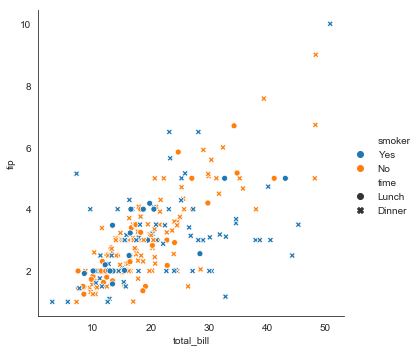

In [106]:
sns.relplot(x = 'total_bill', y = 'tip', hue='smoker',style='time', data=tips);


# Bivariate plots

Split the data up and plot them using facets



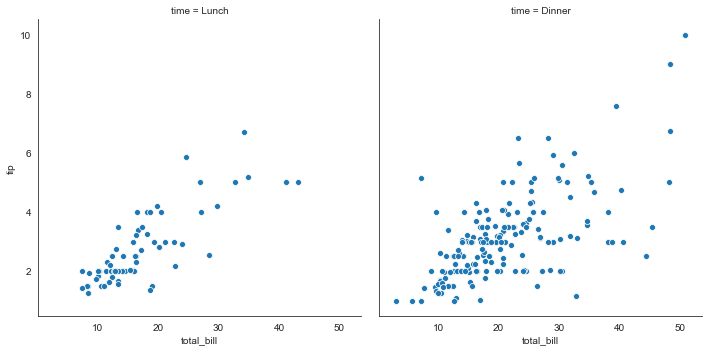

In [107]:
sns.relplot(x = 'total_bill', y = 'tip', data=tips, col='time');


# Bivariate plots

Look at the univariate and bivariate properties together


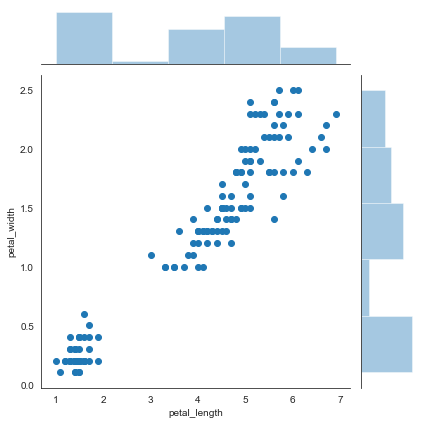

In [108]:
iris = sns.load_dataset('iris')
sns.jointplot(x = 'petal_length',y='petal_width', data=iris);

# Conditioning on categorical variables

## Boxplots

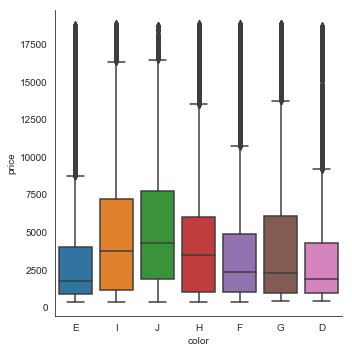

In [109]:
sns.catplot(x='color',y='price', kind='box',data=diamonds)

## Violin Plots
These are reflected density plots, which shows more
of the richness of the data


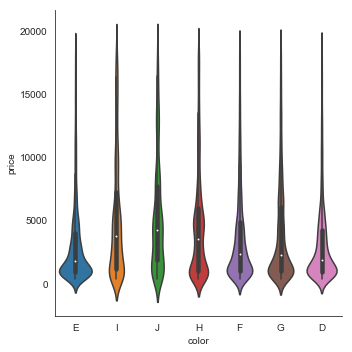

In [110]:
sns.catplot(x='color',y='price', kind='violin',data=diamonds);


## Swarm plots


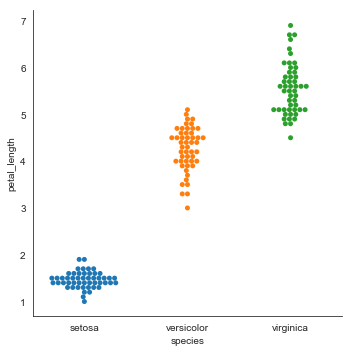

In [111]:
iris = sns.load_dataset('iris')
sns.catplot(x='species',y='petal_length', kind='swarm',data=iris);


## Comparative violin plots



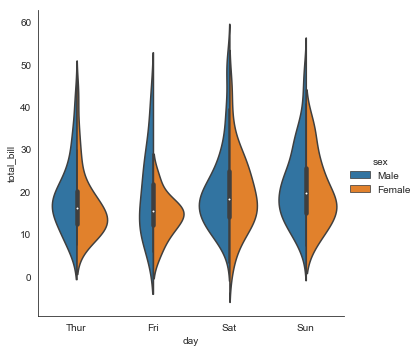

In [112]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips);

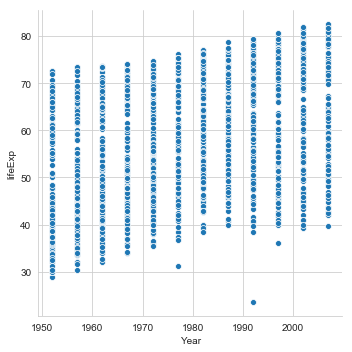

In [115]:
gapminder=pd.read_csv('data/gapminder.tsv', sep='\t')
sns.set_style('whitegrid')
ax = sns.relplot(x='year',y='lifeExp', data=gapminder)
ax.set_xlabels('Year')
plt.show()

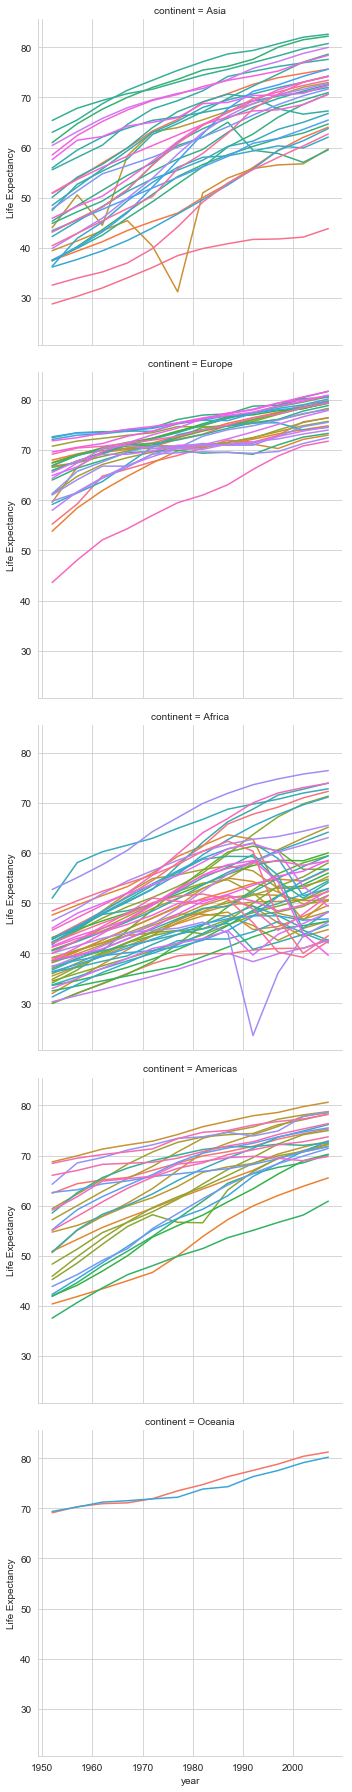

In [116]:
ax = sns.relplot(x='year',y='lifeExp', data=gapminder, hue='country',
  kind='line', row='continent', legend=False)
ax.set(ylabel = 'Life Expectancy')
plt.show()


## Exploring all the variables



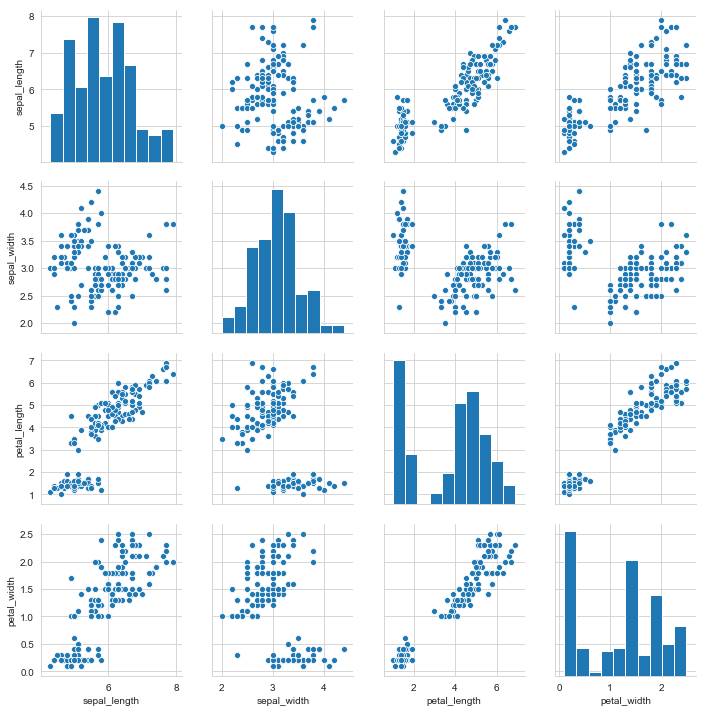

In [117]:
sns.pairplot(iris);

# Adding lines

## A straight line

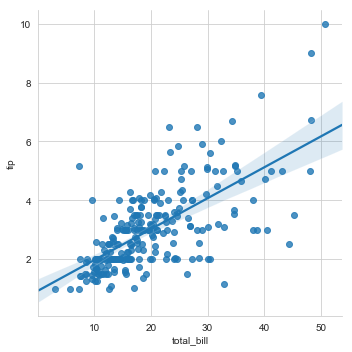

In [118]:
sns.lmplot(x = 'total_bill', y = 'tip', data=tips);


## A smoother


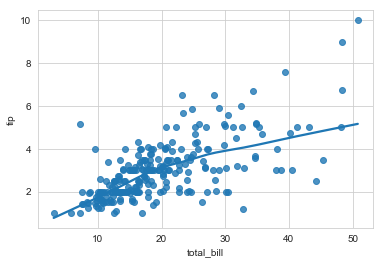

In [119]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips,
  lowess=True);


# Modeling

## Statsmodels

The `statsmodels` package is well-integrated with `pandas`,
and it can use formula-based model specifications like R.



In [120]:
import statsmodels.formula.api as smf

model=smf.ols('tip ~ total_bill', data = tips)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           6.69e-34
Time:                        08:38:14   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Resources

## Books

Three books are specially useful here:

1. Python for Data Analysis (2nd edition) by Wes McKinney
1. Python Data Science Handbook by Jake Vanderplas
1. Pandas for Everyone by Daniel Chen

## Tutorials

1. Daniel Chen's SciPy 2017 tutorial ([YouTube](https://www.youtube.com/watch?v=oGzU688xCUs)) ([GitHub](https://github.com/chendaniely/scipy-2017-tutorial-pandas))
1. Datacamp ([link](https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python))
1. [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)